In [1]:
import matplotlib
from matplotlib import font_manager

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv

fontpaths = ["C:/Users/kwon3/AppData/Local/Microsoft/Windows/Fonts/NanumGothicBold.ttf"]
font_files = font_manager.findSystemFonts(fontpaths=fontpaths)

for ff in font_files:
    font_manager.fontManager.addfont(ff)

matplotlib.rc('font', family="Malgun Gothic")
matplotlib.rcParams['axes.unicode_minus'] = False

'sudo'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'sudo'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

- 데이터 경로 변수

In [3]:
# DATA_PATH = "/content/drive/MyDrive/파이널프로젝트/data/"
# DATA_PATH

In [4]:
DATA_PATH = "data/"
DATA_PATH

'data/'

- 시드값

In [5]:
SEED = 42

- 데이터 불러오기

In [6]:
import pandas as pd
import numpy as np

train_tr = pd.read_csv(f"{DATA_PATH}store_train_transactions.csv") # 학습용 구매기록 데이터
train_target = pd.read_csv(f"{DATA_PATH}store_train.csv") # 학습용 정답 데이터
test_tr = pd.read_csv(f"{DATA_PATH}store_test_transactions.csv") # 테스트용 구매기록 데이터
submit = pd.read_csv(f"{DATA_PATH}store_submission.csv") # 제출 양식 데이터

train_tr.shape , train_target.shape , test_tr.shape , submit.shape

((523105, 7), (14940, 2), (441196, 7), (12225, 2))

- 공통 피처 파일 불러오기

In [7]:
train_ft = pd.read_csv(f"{DATA_PATH}train_common.csv") # 학습 데이터(피처)
test_ft = pd.read_csv(f"{DATA_PATH}test_common.csv") # 테스트 데이터(피처)

train_ft.shape , test_ft.shape

((14940, 793), (12225, 793))

In [8]:
# cols = train_ft.columns[train_ft.columns.str.startswith("인기브랜드")]
# train_ft.drop(columns=cols, inplace=True)
# test_ft.drop(columns=cols, inplace=True)

# train_ft.shape, test_ft.shape

In [9]:
# train_ft.to_csv(f"{DATA_PATH}train_common.csv", index=False)
# test_ft.to_csv(f"{DATA_PATH}test_common.csv", index=False)

- 정답 데이터

In [10]:
target = train_target["target"]
target

0        1.0
1        1.0
2        0.0
3        0.0
4        0.0
        ... 
14935    0.0
14936    0.0
14937    0.0
14938    1.0
14939    1.0
Name: target, Length: 14940, dtype: float64

# 결측치 처리

In [11]:
mask = train_ft.isnull().sum() > 0
train_ft.isnull().sum()[mask]

구매금액표준편차             405
구매금액_skew            880
구매금액_kurtosis       1340
구매금액_변동성             405
환불건수                6221
총환불금액               6221
평균환불금액              6221
최소환불금액              6221
최대환불금액              6221
환불금액표준편차            9222
환불금액_skew          10937
환불금액_kurtosis      11963
고가제품환불비율            6221
중가제품환불비율            6221
저가제품환불비율            6221
환불후재구매브랜드_count    14438
환불후재구매비율           14438
구매금액_대비_환불금액        6221
환불건수_대비_구매건수        6221
dtype: int64

In [12]:
mask = test_ft.isnull().sum() > 0
test_ft.isnull().sum()[mask]

구매금액표준편차             262
구매금액_skew            631
구매금액_kurtosis       1006
구매금액_변동성             262
환불건수                4972
총환불금액               4972
평균환불금액              4972
최소환불금액              4972
최대환불금액              4972
환불금액표준편차            7347
환불금액_skew           8744
환불금액_kurtosis       9660
고가제품환불비율            4972
중가제품환불비율            4972
저가제품환불비율            4972
환불후재구매브랜드_count    11791
환불후재구매비율           11791
구매금액_대비_환불금액        4972
환불건수_대비_구매건수        4972
dtype: int64

# 특성 공학(Feature Engineering)

- ID 변수 제외

In [13]:
train_ft = train_ft.iloc[:,1:]
test_ft = test_ft.iloc[:,1:]
train_ft.shape, test_ft.shape

((14940, 792), (12225, 792))

- 추가 피처 만들어 보기

In [14]:
# cols = [ col for col in train_ft.columns if col.startswith("지점코드_구매횟수_") ]

# train_ft["지점코드별_구매횟수_std"] = train_ft[cols].std(axis=1)
# train_ft["지점코드별_구매횟수_skew"] = train_ft[cols].skew(axis=1)
# train_ft["지점코드별_구매횟수_kurt"] = train_ft[cols].kurt(axis=1)

# test_ft["지점코드별_구매횟수_std"] = test_ft[cols].std(axis=1)
# test_ft["지점코드별_구매횟수_skew"] = test_ft[cols].skew(axis=1)
# test_ft["지점코드별_구매횟수_kurt"] = test_ft[cols].kurt(axis=1)

# train_ft.shape, test_ft.shape

In [15]:
# cols = [ col for col in train_ft.columns if col.startswith("지점코드_구매합계_") ]

# train_ft["지점코드별_구매합계_std"] = train_ft[cols].std(axis=1)
# train_ft["지점코드별_구매합계_skew"] = train_ft[cols].skew(axis=1)
# train_ft["지점코드별_구매합계_kurt"] = train_ft[cols].kurt(axis=1)

# test_ft["지점코드별_구매합계_std"] = test_ft[cols].std(axis=1)
# test_ft["지점코드별_구매합계_skew"] = test_ft[cols].skew(axis=1)
# test_ft["지점코드별_구매합계_kurt"] = test_ft[cols].kurt(axis=1)

# train_ft.shape, test_ft.shape

In [16]:
# cols = [ col for col in train_ft.columns if col.startswith("중분류_구매횟수_") ]

# train_ft["중분류별_구매횟수_std"] = train_ft[cols].std(axis=1)
# train_ft["중분류별_구매횟수_skew"] = train_ft[cols].skew(axis=1)
# train_ft["중분류별_구매횟수_kurt"] = train_ft[cols].kurt(axis=1)

# test_ft["중분류별_구매횟수_std"] = test_ft[cols].std(axis=1)
# test_ft["중분류별_구매횟수_skew"] = test_ft[cols].skew(axis=1)
# test_ft["중분류별_구매횟수_kurt"] = test_ft[cols].kurt(axis=1)

# train_ft.shape, test_ft.shape

In [17]:
# cols = [ col for col in train_ft.columns if col.startswith("중분류_구매합계_") ]

# train_ft["중분류별_구매합계_std"] = train_ft[cols].std(axis=1)
# train_ft["중분류별_구매합계_skew"] = train_ft[cols].skew(axis=1)
# train_ft["중분류별_구매합계_kurt"] = train_ft[cols].kurt(axis=1)

# test_ft["중분류별_구매합계_std"] = test_ft[cols].std(axis=1)
# test_ft["중분류별_구매합계_skew"] = test_ft[cols].skew(axis=1)
# test_ft["중분류별_구매합계_kurt"] = test_ft[cols].kurt(axis=1)

# train_ft.shape, test_ft.shape

In [18]:
# cols = [ col for col in train_ft.columns if col.startswith("대분류_구매횟수_") ]

# train_ft["대분류별_구매횟수_std"] = train_ft[cols].std(axis=1)
# train_ft["대분류별_구매횟수_skew"] = train_ft[cols].skew(axis=1)
# train_ft["대분류별_구매횟수_kurt"] = train_ft[cols].kurt(axis=1)

# test_ft["대분류별_구매횟수_std"] = test_ft[cols].std(axis=1)
# test_ft["대분류별_구매횟수_skew"] = test_ft[cols].skew(axis=1)
# test_ft["대분류별_구매횟수_kurt"] = test_ft[cols].kurt(axis=1)

# train_ft.shape, test_ft.shape

In [19]:
# cols = [ col for col in train_ft.columns if col.startswith("대분류_구매합계_") ]

# train_ft["대분류별_구매합계_std"] = train_ft[cols].std(axis=1)
# train_ft["대분류별_구매합계_skew"] = train_ft[cols].skew(axis=1)
# train_ft["대분류별_구매합계_kurt"] = train_ft[cols].kurt(axis=1)

# test_ft["대분류별_구매합계_std"] = test_ft[cols].std(axis=1)
# test_ft["대분류별_구매합계_skew"] = test_ft[cols].skew(axis=1)
# test_ft["대분류별_구매합계_kurt"] = test_ft[cols].kurt(axis=1)

# train_ft.shape, test_ft.shape

In [20]:
# cols = [ col for col in train_ft.columns if col.startswith("브랜드코드_구매횟수_") ]

# train_ft["브랜드코드별_구매횟수_std"] = train_ft[cols].std(axis=1)
# train_ft["브랜드코드별_구매횟수_skew"] = train_ft[cols].skew(axis=1)
# train_ft["브랜드코드별_구매횟수_kurt"] = train_ft[cols].kurt(axis=1)

# test_ft["브랜드코드별_구매횟수_std"] = test_ft[cols].std(axis=1)
# test_ft["브랜드코드별_구매횟수_skew"] = test_ft[cols].skew(axis=1)
# test_ft["브랜드코드별_구매횟수_kurt"] = test_ft[cols].kurt(axis=1)

# train_ft.shape, test_ft.shape

In [21]:
# cols = [ col for col in train_ft.columns if col.startswith("브랜드코드_구매합계_") ]

# train_ft["브랜드코드별_구매합계_std"] = train_ft[cols].std(axis=1)
# train_ft["브랜드코드별_구매합계_skew"] = train_ft[cols].skew(axis=1)
# train_ft["브랜드코드별_구매합계_kurt"] = train_ft[cols].kurt(axis=1)

# test_ft["브랜드코드별_구매합계_std"] = test_ft[cols].std(axis=1)
# test_ft["브랜드코드별_구매합계_skew"] = test_ft[cols].skew(axis=1)
# test_ft["브랜드코드별_구매합계_kurt"] = test_ft[cols].kurt(axis=1)

# train_ft.shape, test_ft.shape

In [22]:
cols = [ col for col in train_ft.columns if col.endswith("요일_구매비율") ]

train_ft["요일별_구매비율_std"] = train_ft[cols].std(axis=1)
train_ft["요일별_구매비율_skew"] = train_ft[cols].skew(axis=1)
train_ft["요일별_구매비율_kurt"] = train_ft[cols].kurt(axis=1)

test_ft["요일별_구매비율_std"] = test_ft[cols].std(axis=1)
test_ft["요일별_구매비율_skew"] = test_ft[cols].skew(axis=1)
test_ft["요일별_구매비율_kurt"] = test_ft[cols].kurt(axis=1)

train_ft.shape, test_ft.shape

((14940, 795), (12225, 795))

In [23]:
# cols = [ col for col in train_ft.columns if col.endswith("월_구매비율") ]

# train_ft["월별_구매비율_std"] = train_ft[cols].std(axis=1)
# train_ft["월별_구매비율_skew"] = train_ft[cols].skew(axis=1)
# train_ft["월별_구매비율_kurt"] = train_ft[cols].kurt(axis=1)

# test_ft["월별_구매비율_std"] = test_ft[cols].std(axis=1)
# test_ft["월별_구매비율_skew"] = test_ft[cols].skew(axis=1)
# test_ft["월별_구매비율_kurt"] = test_ft[cols].kurt(axis=1)

# train_ft.shape, test_ft.shape

In [24]:
cols = ["봄_구매비율","여름_구매비율","가을_구매비율","겨울_구매비율"]

train_ft["계절별_구매비율_std"] = train_ft[cols].std(axis=1)
train_ft["계절별_구매비율_skew"] = train_ft[cols].skew(axis=1)
train_ft["계절별_구매비율_kurt"] = train_ft[cols].kurt(axis=1)

test_ft["계절별_구매비율_std"] = test_ft[cols].std(axis=1)
test_ft["계절별_구매비율_skew"] = test_ft[cols].skew(axis=1)
test_ft["계절별_구매비율_kurt"] = test_ft[cols].kurt(axis=1)

train_ft.shape, test_ft.shape

((14940, 798), (12225, 798))

In [25]:
# cols = [ col for col in train_ft.columns if col.endswith("분기_구매비율") ]

# train_ft["분기별_구매비율_std"] = train_ft[cols].std(axis=1)
# train_ft["분기별_구매비율_skew"] = train_ft[cols].skew(axis=1)
# train_ft["분기별_구매비율_kurt"] = train_ft[cols].kurt(axis=1)

# test_ft["분기별_구매비율_std"] = test_ft[cols].std(axis=1)
# test_ft["분기별_구매비율_skew"] = test_ft[cols].skew(axis=1)
# test_ft["분기별_구매비율_kurt"] = test_ft[cols].kurt(axis=1)

# train_ft.shape, test_ft.shape

In [26]:
# cols = [ col for col in train_ft.columns if col.endswith("년_구매비율") ]

# train_ft["년도별_구매비율_std"] = train_ft[cols].std(axis=1)
# test_ft["년도별_구매비율_std"] = test_ft[cols].std(axis=1)

# train_ft.shape, test_ft.shape

In [27]:
# cols_지점 = [col for col in train_ft.columns if col.startswith("지점코드_구매횟수_")]
# cols_중분류 = [col for col in train_ft.columns if col.startswith("중분류_구매횟수_")]
# cols_대분류 = [col for col in train_ft.columns if col.startswith("대분류_구매횟수_")]

# train_ft["구매집중도_지점"] = train_ft[cols_지점].max(axis=1) / train_ft[cols_지점].sum(axis=1)
# train_ft["구매집중도_중분류"] = train_ft[cols_중분류].max(axis=1) / train_ft[cols_중분류].sum(axis=1)
# train_ft["구매집중도_대분류"] = train_ft[cols_대분류].max(axis=1) / train_ft[cols_대분류].sum(axis=1)

# test_ft["구매집중도_지점"] = test_ft[cols_지점].max(axis=1) / test_ft[cols_지점].sum(axis=1)
# test_ft["구매집중도_중분류"] = test_ft[cols_중분류].max(axis=1) / test_ft[cols_중분류].sum(axis=1)
# test_ft["구매집중도_대분류"] = test_ft[cols_대분류].max(axis=1) / test_ft[cols_대분류].sum(axis=1)

# train_ft.shape, test_ft.shape

## Feature Encoding

- 범주형 피처
    - 주구매지점, 주구매_중분류, 주구매_대분류, 선호브랜드코드, 고객등급

In [28]:
# %pip install category_encoders

In [29]:
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

oh_enc = OneHotEncoder(handle_unknown="ignore")
oh_enc_cols = ["고객등급"]
oh_enc_data = pd.concat([train_ft[oh_enc_cols], test_ft[oh_enc_cols]])
oh_enc.fit(oh_enc_data)

train_ft[oh_enc.get_feature_names_out()] = oh_enc.transform(train_ft[oh_enc_cols]).toarray()
test_ft[oh_enc.get_feature_names_out()] = oh_enc.transform(test_ft[oh_enc_cols]).toarray()

train_ft.shape, test_ft.shape

((14940, 803), (12225, 803))

In [30]:
train_ft['선호브랜드코드'] = train_ft['선호브랜드코드'].astype('category')
test_ft['선호브랜드코드'] = test_ft['선호브랜드코드'].astype('category')

combined_brands = pd.concat([train_ft['선호브랜드코드'], test_ft['선호브랜드코드']])

enc = ce.CountEncoder()
train_ft["선호브랜드코드_cnt"] = enc.fit_transform(train_ft[['선호브랜드코드']])
test_ft["선호브랜드코드_cnt"] = enc.transform(test_ft[['선호브랜드코드']])

train_ft.drop(columns=["선호브랜드코드"], inplace=True)
test_ft.drop(columns=["선호브랜드코드"], inplace=True)

train_ft.shape, test_ft.shape

((14940, 803), (12225, 803))

- 문자열 피처 삭제

In [31]:
cols = train_ft.select_dtypes(["object", "datetime"]).columns.tolist()
cols

['주구매_중분류', '주구매_대분류', '고객등급']

In [32]:
train_ft = train_ft.drop(columns=cols)
test_ft = test_ft.drop(columns=cols)
train_ft.shape, test_ft.shape

((14940, 800), (12225, 800))

In [33]:
train_ft.select_dtypes("object").columns , test_ft.select_dtypes("object").columns

(Index([], dtype='object'), Index([], dtype='object'))

In [34]:
train_ft.select_dtypes("datetime").columns, test_ft.select_dtypes("datetime").columns

(Index([], dtype='object'), Index([], dtype='object'))

## Feature Scaling

In [35]:
train_ft.isin([np.inf, -np.inf]).any().sum(), test_ft.isin([np.inf, -np.inf]).any().sum()

(0, 0)

In [36]:
train_ft = train_ft.fillna(0)
test_ft = test_ft.fillna(0)

In [37]:
train_ft.isna().sum().sum(), test_ft.isna().sum().sum()

(0, 0)

In [38]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer, Normalizer
scaler = StandardScaler()

train_ft[train_ft.columns] = scaler.fit_transform(train_ft)
test_ft[test_ft.columns] = scaler.transform(test_ft)
train_ft.head()

,총방문일수,백화점이용기간,구매주기,주말방문일수,일별평균구매건수,구매간격_표준편차,평균구매요일,주구매요일,월요일_구매비율,화요일_구매비율,...,요일별_구매비율_kurt,계절별_구매비율_std,계절별_구매비율_skew,계절별_구매비율_kurt,고객등급_Black,고객등급_Diamond,고객등급_Gold,고객등급_Normal,고객등급_Platinum,선호브랜드코드_cnt
0,-0.441985,-0.031924,0.191603,-0.363618,-0.292817,0.019124,0.040957,-0.469891,-0.340771,-0.866857,...,-0.606462,-0.637787,-1.894117,0.896058,-0.303357,-0.133863,-0.204728,0.433781,-0.128585,-1.002992
1,0.202927,0.861742,-0.406568,-0.569238,0.470397,-0.545535,-0.799074,0.116688,-0.502484,0.896581,...,-1.001845,-0.625854,-0.566732,-1.887284,-0.303357,-0.133863,-0.204728,0.433781,-0.128585,1.056804
2,2.030180,0.898594,-0.905045,1.486955,0.220618,-0.890269,-0.770108,-1.643049,0.905371,0.387353,...,-0.072100,-0.489084,0.763888,0.654645,-0.303357,7.470347,-0.204728,-2.305310,-0.128585,-1.000947
3,3.911175,0.797251,-1.054588,3.131908,0.565798,-0.986871,0.139600,0.703267,-0.311925,-0.102556,...,-1.023329,-0.903228,1.332433,1.152378,-0.303357,7.470347,-0.204728,-2.305310,-0.128585,-0.940468
4,0.364155,0.502433,-0.556111,0.458858,-0.388218,-0.534063,1.088582,0.703267,-0.259915,-0.492795,...,-0.276613,-0.240864,0.233283,-0.749697,-0.303357,-0.133863,-0.204728,0.433781,-0.128585,1.056804


# 차원축소

- 학습데이터에서 분산 임계값이 0인 경우 제외

In [39]:
from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold(threshold=0)
vt.fit(train_ft)

train_vt = pd.DataFrame(vt.transform(train_ft), columns=train_ft.columns[vt.get_support()])
test_vt = test_ft[train_vt.columns]

train_vt.shape, test_vt.shape

((14940, 800), (12225, 800))

In [40]:
cols = [
    "환불후재구매브랜드_count",
    "방문일수_대비_구매건수",
]

train_vt.drop(columns=cols, inplace=True)
test_vt.drop(columns=cols, inplace=True)
train_vt.shape, test_vt.shape

((14940, 798), (12225, 798))

- 특성 간 상관관계 90% 이상인 경우 제거

In [41]:
# corr = train_vt.corr().abs()
# upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
# to_drop = [col for col in upper.columns if any(upper[col] >= 0.9)]

# train_vt.drop(columns=to_drop, inplace=True)
# test_vt.drop(columns=to_drop, inplace=True)
# train_vt.shape, test_vt.shape

In [42]:
# train_vt.to_csv(f"{DATA_PATH}train_corr.csv",index=False)
# test_vt.to_csv(f"{DATA_PATH}test_corr.csv",index=False)

- cv 점수 확인

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from lightgbm import LGBMClassifier

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)
model = LGBMClassifier(random_state=SEED)
model.fit(train_vt, target)

scores = cross_val_score(model, train_vt, target, cv=cv, scoring="f1_macro", n_jobs=-1)
np.mean(scores)

[LightGBM] [Info] Number of positive: 5874, number of negative: 9066
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.032129 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 76327
[LightGBM] [Info] Number of data points in the train set: 14940, number of used features: 764
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393173 -> initscore=-0.433995
[LightGBM] [Info] Start training from score -0.433995


0.7201437214228191

- XAI 활용

c:\Users\kwon3\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[LightGBM] [Info] Number of positive: 5874, number of negative: 9066
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.032233 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 76327
[LightGBM] [Info] Number of data points in the train set: 14940, number of used features: 764
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393173 -> initscore=-0.433995
[LightGBM] [Info] Start training from score -0.433995


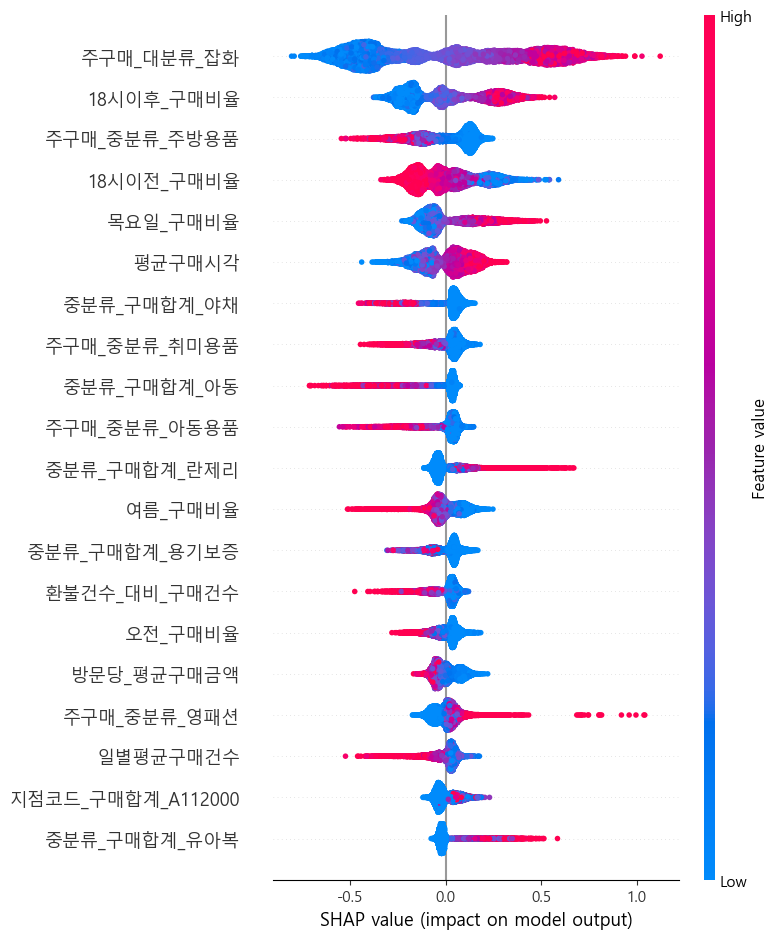

In [44]:
import shap

model = LGBMClassifier(random_state=SEED)
model.fit(train_vt, target)

explainer = shap.Explainer(model)
shap_values = explainer(train_vt)
shap.summary_plot(shap_values, train_vt)

- SelectFromModel

In [46]:
from sklearn.feature_selection import SelectFromModel

rf = RandomForestClassifier(random_state=SEED)

In [ ]:
# thresholds = [
#     'mean', 'median',
#     '0.5*mean', '1.5*mean', '2*mean',
#     '0.5*median', '1.5*median', '2*median'
# ]

thresholds = [f"{i}*median" for i in np.arange(0.1, 1.0, 0.1)]

for threshold in thresholds:
    sfm = SelectFromModel(threshold=threshold, estimator=rf)
    sfm.fit(train_vt, target)
    train_sfm = sfm.transform(train_vt)

    scores = cross_val_score(model, train_sfm, target, cv=cv, scoring="f1_macro", n_jobs=-1)
    print(threshold, np.mean(scores), train_sfm.shape[1])

0.1*median 0.718868372771848 713
0.2*median 0.7196342355926706 655
0.30000000000000004*median 0.721058826169593 606
0.4*median 0.7212160982552742 561
0.5*median 0.720563305480986 520
0.6*median 0.7207913365335037 487
0.7000000000000001*median 0.7207788715128425 461
0.8*median 0.719773118209686 436
0.9*median 0.718176705240323 415


In [47]:
sfm = SelectFromModel(rf, threshold='0.4*median')

train_sfm = sfm.fit_transform(train_vt, target)
test_sfm = sfm.transform(test_vt)

scores = cross_val_score(model, train_sfm, target, cv=cv, scoring="f1_macro", n_jobs=-1)
np.mean(scores), train_sfm.shape

(0.7212160982552742, (14940, 561))

In [48]:
train_sfm = pd.DataFrame(train_sfm, columns=train_vt.columns[sfm.get_support()])
test_sfm = pd.DataFrame(test_sfm, columns=test_vt.columns[sfm.get_support()])

feature_importance = pd.DataFrame({
    'feature': train_sfm.columns,
    'score': sfm.estimator_.feature_importances_[sfm.get_support()]
}).reset_index(drop=True)

feature_importance.sort_values('score', ascending=False).head(30)

,feature,score
53,평균구매시각,0.022176
68,주구매_대분류_잡화,0.020970
49,18시이후_구매비율,0.019116
48,18시이전_구매비율,0.018531
56,저녁_구매비율,0.014934
66,주구매_중분류_주방용품,0.009204
402,중분류_구매합계_용기보증,0.009015
52,주구매시간대,0.008623
549,방문당_평균구매금액,0.008617
11,목요일_구매비율,0.008564


- SelectKBest

In [45]:
from sklearn.feature_selection import SelectKBest

In [383]:
for k in range(100, 700, 50):
    skb = SelectKBest(k=k)
    skb.fit(train_vt, target)
    # skb.fit(train_sfm, target)
    train_skb = skb.transform(train_vt)

    scores = cross_val_score(model, train_skb, target, cv=cv, scoring="f1_macro", n_jobs=-1)
    print(f"특성수={k}, 정확도={np.mean(scores)}")

특성수=100, 정확도=0.711780932398412
특성수=150, 정확도=0.710483758620273
특성수=200, 정확도=0.713646165278235
특성수=250, 정확도=0.714869911371413
특성수=300, 정확도=0.715305027170405
특성수=350, 정확도=0.7167115229403127
특성수=400, 정확도=0.7150479863089558
특성수=450, 정확도=0.7185239463366592
특성수=500, 정확도=0.7157437209291736
특성수=550, 정확도=0.7178764671558318
특성수=600, 정확도=0.7213052832944863
특성수=650, 정확도=0.72375225498769


In [384]:
for k in range(610, 701, 10):
    skb = SelectKBest(k=k)
    skb.fit(train_vt, target)
    train_skb = skb.transform(train_vt)

    scores = cross_val_score(model, train_skb, target, cv=cv, scoring="f1_macro", n_jobs=-1)
    print(f"특성수={k}, 정확도={np.mean(scores)}")

특성수=610, 정확도=0.7216672689568184
특성수=620, 정확도=0.717465257955822
특성수=630, 정확도=0.7214594586011386
특성수=640, 정확도=0.7196409683372721
특성수=650, 정확도=0.72375225498769
특성수=660, 정확도=0.7198389198723966
특성수=670, 정확도=0.7190446052681029
특성수=680, 정확도=0.7214521293879239
특성수=690, 정확도=0.719396969751528
특성수=700, 정확도=0.7191365156808864


In [46]:
skb = SelectKBest(k=650)

train_skb = skb.fit_transform(train_vt, target)
test_skb = skb.transform(test_vt)

scores = cross_val_score(model, train_skb, target, cv=cv, scoring="f1_macro", n_jobs=-1)
np.mean(scores), train_skb.shape

(0.72375225498769, (14940, 650))

In [170]:
feature_scores = pd.DataFrame(
    {'feature': train_vt.columns,
     'score': skb.scores_}
).sort_values('score', ascending=False)

feature_scores.head(50)

,feature,score
68,주구매_대분류_잡화,1613.989214
53,평균구매시각,1420.010188
49,18시이후_구매비율,1388.950728
48,18시이전_구매비율,1388.950728
56,저녁_구매비율,1242.518730
66,주구매_중분류_주방용품,839.961756
52,주구매시간대,761.891833
55,점심_구매비율,597.480912
60,중분류_nunique,582.293480
72,구매건수,495.619758


- SelectPercentile

In [387]:
from sklearn.feature_selection import SelectPercentile

In [922]:
percentiles = [i for i in range(5, 101, 5)]

for percentile in percentiles:
    sp = SelectPercentile(percentile=percentile)
    sp.fit(train_vt, target)
    # sp.fit(train_sfm, target)
    train_sp = sp.transform(train_vt)

    scores = cross_val_score(model, train_sp, target, cv=cv, scoring="f1_macro", n_jobs=-1)
    print(f"percentile={percentile}, 성능={np.mean(scores)}, 특성 수={train_sp.shape[1]}")

percentile=5, 성능=0.6940971935948825, 특성 수=40
percentile=10, 성능=0.7081091784723073, 특성 수=80
percentile=15, 성능=0.7151695968187634, 특성 수=120
percentile=20, 성능=0.7133466292189601, 특성 수=160
percentile=25, 성능=0.713646165278235, 특성 수=200
percentile=30, 성능=0.712195767414645, 특성 수=240
percentile=35, 성능=0.7156177227924537, 특성 수=279
percentile=40, 성능=0.7155728252669238, 특성 수=319
percentile=45, 성능=0.7143084613351361, 특성 수=359
percentile=50, 성능=0.7166634045066773, 특성 수=399
percentile=55, 성능=0.7189352756273703, 특성 수=439
percentile=60, 성능=0.7149488016607171, 특성 수=479
percentile=65, 성능=0.7182754989996416, 특성 수=519
percentile=70, 성능=0.7182335223204024, 특성 수=558
percentile=75, 성능=0.7213052832944863, 특성 수=598
percentile=80, 성능=0.7209694435129184, 특성 수=638
percentile=85, 성능=0.7211202477150553, 특성 수=678
percentile=90, 성능=0.7189698076409023, 특성 수=718
percentile=95, 성능=0.7177394805896573, 특성 수=758
percentile=100, 성능=0.7201437214228191, 특성 수=798


In [923]:
percentiles = [i for i in range(71, 80)]

for percentile in percentiles:
    sp = SelectPercentile(percentile=percentile)
    sp.fit(train_vt, target)
    # sp.fit(train_sfm, target)
    train_sp = sp.transform(train_vt)

    scores = cross_val_score(model, train_sp, target, cv=cv, scoring="f1_macro", n_jobs=-1)
    print(f"percentile={percentile}, 성능={np.mean(scores)}, 특성 수={train_sp.shape[1]}")

percentile=71, 성능=0.717804433287035, 특성 수=566
percentile=72, 성능=0.7190473811517606, 특성 수=574
percentile=73, 성능=0.7173296254562846, 특성 수=582
percentile=74, 성능=0.7187095538827307, 특성 수=590
percentile=75, 성능=0.7213052832944863, 특성 수=598
percentile=76, 성능=0.7192016320697171, 특성 수=606
percentile=77, 성능=0.721711473170492, 특성 수=614
percentile=78, 성능=0.7183497066449497, 특성 수=622
percentile=79, 성능=0.7214594586011386, 특성 수=630


In [388]:
sp = SelectPercentile(percentile=40)

train_sp = sp.fit_transform(train_vt, target)
test_sp = sp.transform(test_vt)

scores = cross_val_score(model, train_sp, target, cv=cv, scoring="f1_macro", n_jobs=-1)
np.mean(scores), train_sp.shape

(0.7155728252669238, (14940, 319))

- PCA

In [389]:
from sklearn.decomposition import PCA

In [391]:
pca = PCA(0.95, random_state=SEED)

pca_train = pca.fit_transform(train_vt)
pca_test = pca.transform(test_vt)

scores = cross_val_score(model, pca_train, target, cv=cv, scoring="f1_macro", n_jobs=-1)
np.mean(scores), pca_train.shape

(0.7034528858901525, (14940, 436))

- 위에서 축소한 데이터에 대해 PCA

In [397]:
pca2 = PCA(0.95, random_state=SEED)

pca2_train = pca2.fit_transform(train_skb)
pca2_test = pca2.transform(test_skb)

scores = cross_val_score(model, pca2_train, target, cv=cv, scoring="f1_macro", n_jobs=-1)
np.mean(scores), pca2_train.shape

(0.706997005808565, (14940, 359))

- KernelPCA

In [937]:
# from sklearn.decomposition import KernelPCA

# kpca = KernelPCA(kernel='rbf', random_state=SEED)
# kpca.fit(train_vt)
# kpca_train = kpca.transform(train_vt)

# scores = cross_val_score(model, kpca_train, target, cv=cv, scoring="f1_macro", n_jobs=-1)
# np.mean(scores), kpca_train.shape

- TruncatedSVD

In [174]:
from sklearn.decomposition import TruncatedSVD

In [178]:
svd = TruncatedSVD(600, random_state=SEED)
svd.fit(train_vt)
svd_train = svd.transform(train_vt)

scores = cross_val_score(model, svd_train, target, cv=cv, scoring="f1_macro", n_jobs=-1)
np.mean(scores), svd_train.shape

(0.7034124649766833, (14940, 600))

- RandomProjection

In [179]:
from sklearn.random_projection import GaussianRandomProjection
from sklearn.random_projection import SparseRandomProjection

In [181]:
grp = GaussianRandomProjection(700, random_state=SEED)
grp.fit(train_vt)
grp_train = grp.transform(train_vt)

scores = cross_val_score(model, grp_train, target, cv=cv, scoring="f1_macro", n_jobs=-1)
np.mean(scores), grp_train.shape

(0.7010428138821755, (14940, 700))

In [182]:
srp = SparseRandomProjection(700, random_state=SEED)
srp.fit(train_vt)
srp_train = srp.transform(train_vt)

scores = cross_val_score(model, srp_train, target, cv=cv, scoring="f1_macro", n_jobs=-1)
np.mean(scores), srp_train.shape

(0.7076133859142825, (14940, 700))

- LDA

In [47]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
lda_train = lda.fit_transform(train_skb, target)
lda_test = lda.transform(test_skb)

scores = cross_val_score(model, lda_train, target, cv=cv, scoring="f1_macro", n_jobs=-1)
np.mean(scores), lda_train.shape

(0.7416351010447835, (14940, 1))

- RFE

In [ ]:
# from sklearn.feature_selection import RFE

# rfe = RFE(model, step=10, n_features_to_select=100, verbose=2)
# rfe.fit(train_vt, target, early_stopping=True)
# train_rfe = rfe.transform(train_vt)

# scores = cross_val_score(model, train_rfe, target, cv=cv, scoring="f1_macro", n_jobs=-1)
# np.mean(scores), train_rfe.shape

In [71]:
# df = pd.DataFrame({
#     "Feature": train_vt.columns[rfe.support_],
#     "Importance": rfe.estimator_.feature_importances_
# }).sort_values(by="Importance", ascending=False)

# df.head(30)

- RFECV

In [49]:
from sklearn.feature_selection import RFECV

In [50]:
rfecv = RFECV(model, step=10, cv=cv, scoring="f1_macro", n_jobs=-1)
rfecv.fit(train_skb, target)
train_rfecv = rfecv.transform(train_skb)
test_rfecv = rfecv.transform(test_skb)

scores = cross_val_score(model, train_rfecv, target, cv=cv, scoring="f1_macro", n_jobs=-1)
np.mean(scores), train_rfecv.shape

[LightGBM] [Info] Number of positive: 5874, number of negative: 9066
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.032371 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 69043
[LightGBM] [Info] Number of data points in the train set: 14940, number of used features: 639
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393173 -> initscore=-0.433995
[LightGBM] [Info] Start training from score -0.433995
[LightGBM] [Info] Number of positive: 5874, number of negative: 9066
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.029640 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 68984
[LightGBM] [Info] Number of data points in the train set: 14940, number of used features: 630
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393173 -> initscore=-0.433995
[LightGBM] [Info] Start training from score -0.433995
[LightGBM] [

(0.7188593438674384, (14940, 380))

In [403]:
# df = pd.DataFrame({
#     "Feature": train_vt.columns[rfecv.support_],
#     "Importance": rfecv.estimator_.feature_importances_
# }).sort_values(by="Importance", ascending=False)

# df.head(50)

- 최종적으로 모델에 넣을 학습데이터

In [51]:
train_vt.shape, test_vt.shape, train_rfecv.shape, test_rfecv.shape, lda_train.shape, lda_test.shape

((14940, 798),
 (12225, 798),
 (14940, 380),
 (12225, 380),
 (14940, 1),
 (12225, 1))

In [389]:
# train_ft_df = pd.DataFrame(train_ft)
# train_ft_df.to_csv(f"{DATA_PATH}selected_train.csv", index=False)
# test_ft_df = pd.DataFrame(test_ft)
# test_ft_df.to_csv(f"{DATA_PATH}selected_test.csv", index=False)

# 모델 선택

In [257]:
# train_ft = pd.read_csv(f"{DATA_PATH}selected_train.csv")
# test_ft = pd.read_csv(f"{DATA_PATH}selected_test.csv")

In [235]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

X_train, X_val, y_train, y_val = train_test_split(
    lda_train, target, test_size=0.2, random_state=SEED, stratify=target, shuffle=True
)

In [236]:
model = LGBMClassifier(random_state=SEED)
model.fit(X_train, y_train)

train_pred = model.predict(X_train)
val_pred = model.predict(X_val)

f1_score(y_train, train_pred, average='macro'), f1_score(y_val, val_pred, average='macro')

[LightGBM] [Info] Number of positive: 4699, number of negative: 7253
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000024 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 11952, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393156 -> initscore=-0.434065
[LightGBM] [Info] Start training from score -0.434065


(0.7454093237599762, 0.7507248839528922)

- LogisticRegression

In [237]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [238]:
params = {
    'penalty': 'l1',
    'C': 0.01,
    'solver': 'liblinear',
    'max_iter': 3000,
    'class_weight': 'balanced',
}

lr = LogisticRegression(**params, random_state=SEED)
lr.fit(X_train, y_train)

f1_score(y_train, lr.predict(X_train), average='macro'), f1_score(y_val, lr.predict(X_val), average='macro')

(0.738748309408898, 0.7438271604938271)

- LGBMClassifier

In [239]:
params = {
    'num_leaves': 31,
    'max_depth': -1,
    'min_child_samples': 20,
    'learning_rate': 0.05,
}

lgbm = LGBMClassifier(**params, random_state=SEED)
lgbm.fit(X_train, y_train)

f1_score(y_train, lgbm.predict(X_train), average='macro'), f1_score(y_val, lgbm.predict(X_val), average='macro')

[LightGBM] [Info] Number of positive: 4699, number of negative: 7253
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000027 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 11952, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393156 -> initscore=-0.434065
[LightGBM] [Info] Start training from score -0.434065


(0.7432709539564378, 0.7466261622589005)

- XGBoost

In [240]:
from xgboost import XGBClassifier

In [241]:
params = {
    'max_depth': 6,
    'learning_rate': 0.01,
    'n_estimators': 300,
    'gamma': 0.5,
    'alpha': 0.3,
    'lambda': 1.3,
    'subsample': 0.7,
    'objective': 'binary:logistic',
    'scale_pos_weight': 1.5,
}

xgb = XGBClassifier(**params, random_state=SEED)
xgb.fit(X_train, y_train)

f1_score(y_train, xgb.predict(X_train), average='macro'), f1_score(y_val, xgb.predict(X_val), average='macro')

(0.7465409787163042, 0.7396793978456411)

- RandomForestClassifier

In [242]:
from sklearn.ensemble import RandomForestClassifier

In [243]:
params = {
    # # rfecv
    # 'n_estimators': 500,
    # 'max_depth': 10,
    # 'min_samples_split': 6,
    # 'min_samples_leaf': 2,
    # 'max_features': 'sqrt',
    # 'class_weight': 'balanced',
    # 'max_samples': 0.8,
    # 'criterion': 'entropy',
    # 'oob_score': True,
    # 'n_jobs': -1,
    
    # # vt
    # 'n_estimators': 500,
    # 'max_depth': 9,
    # 'min_samples_split': 4,
    # 'min_samples_leaf': 2,
    # 'class_weight': 'balanced',
    # 'max_samples': 0.8,
    # 'criterion': 'entropy',
    # 'oob_score': True,
    # 'n_jobs': -1,
    
    # lda
    'n_estimators': 500,
    'max_depth': 10,
    'min_samples_split': 6,
    'min_samples_leaf': 2,
    'max_features': 'sqrt',
    'class_weight': 'balanced',
    'max_samples': 0.8,
    'criterion': 'entropy',
    'oob_score': True,
    'n_jobs': -1,
}

rf = RandomForestClassifier(**params, random_state=SEED)
rf.fit(X_train, y_train)

f1_score(y_train, rf.predict(X_train), average='macro'), f1_score(y_val, rf.predict(X_val), average='macro')

(0.7656442645982835, 0.7423208136476576)

# 앙상블

- 스태킹

In [244]:
from sklearn.ensemble import StackingClassifier

meta_model = LogisticRegression(
    C=0.1,
    max_iter=3000,
    class_weight="balanced",
    solver="liblinear",
    penalty="l1",
    random_state=SEED,
)

params = {
    "estimators": [("lr", lr), ("lgbm", lgbm), ("xgb", xgb), ("rf", rf)],
    "final_estimator": meta_model,
    "cv": cv,
    "n_jobs": -1,
}

stacking = StackingClassifier(**params)
stacking.fit(X_train, y_train)

f1_score(y_train, stacking.predict(X_train), average="macro"), f1_score(
    y_val, stacking.predict(X_val), average="macro"
)

(0.7398460588116986, 0.7490338997015508)

In [245]:
stacking.fit(lda_train, target)
pred_lda = stacking.predict_proba(lda_test)[:, 1]
pred_lda

array([0.08683591, 0.41790884, 0.30527953, ..., 0.07321831, 0.30147129,
       0.1240214 ])

In [234]:
stacking.fit(train_vt, target)
pred_vt = stacking.predict_proba(test_vt)[:, 1]
pred_vt

array([0.14413809, 0.49606213, 0.35864615, ..., 0.11173123, 0.22407353,
       0.12265419])

In [ ]:
stacking.fit(train_rfecv, target)
pred_rfecv = stacking.predict_proba(test_rfecv)[:, 1]
pred_rfecv

array([0.152276  , 0.50198087, 0.35406201, ..., 0.12317094, 0.24023669,
       0.12501484])

In [249]:
pred_proba = np.mean([pred_lda, pred_vt, pred_rfecv], axis=0)
pred = (pred_proba >= 0.5).astype(int)
submit['target'] = pred

- 보팅

In [227]:
from sklearn.ensemble import VotingClassifier

params = {
    'estimators': [('lr', lr), ('lgbm', lgbm), ('xgb', xgb), ('rf', rf)],
    'voting': 'soft'
}

voting = VotingClassifier(**params)
voting.fit(X_train, y_train)

f1_score(y_train, voting.predict(X_train), average='macro'), f1_score(y_val, voting.predict(X_val), average='macro')

[LightGBM] [Info] Number of positive: 4699, number of negative: 7253
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000029 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 11952, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393156 -> initscore=-0.434065
[LightGBM] [Info] Start training from score -0.434065


(0.7627709640854392, 0.7492820540009728)

- 예측값 확률로 출력

In [301]:
voting.fit(train_ft, target)
pred = voting.predict(test_ft)
submit["target"] = pred

[LightGBM] [Info] Number of positive: 5874, number of negative: 9066
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.027622 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 85077
[LightGBM] [Info] Number of data points in the train set: 14940, number of used features: 650
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393173 -> initscore=-0.433995
[LightGBM] [Info] Start training from score -0.433995


# 테스트 데이터 예측

In [91]:
pred = model.predict(test_ft)
pred

array([0., 0., 0., ..., 0., 0., 0.])

In [563]:
# pred = model.predict_proba(test_ft)[:,1]
# pred

# 평가를 위한 제출 파일 생성
- 예측 결과를 target 컬럼에 넣어 csv 파일로 저장후에 제출한다.

In [113]:
submit["target"] = pred
submit

,ID,target
0,test_0,0.0
1,test_1,1.0
2,test_2,0.0
3,test_3,1.0
4,test_4,1.0
...,...,...
12220,test_12220,1.0
12221,test_12221,0.0
12222,test_12222,0.0
12223,test_12223,0.0


- 예측 결과를 csv 파일로 저장하여 제출

In [250]:
submit.to_csv(f"{DATA_PATH}submit.csv",index=False)